# Investigating the effect of Company Announcements on their Share Price following COVID-19 (using the S&P 500)

A lot of company valuation speculation has come about since the C0rona-VIrus-Disease-2019 (COVID-19 or COVID for short) started to impact the stock market (estimated on the 20$^{\text{th}}$ of February 2020, 2020-02-20). Many investors tried to estimate the impact of the outbreak on businesses and trade accordingly as fast as possible. In this haste, it is possible that they miss-priced the effect of COVID on certain stocks. \
This article lays out a framework to investigate whether the Announcement of Financial Statements after COVID (*id est* (*i.e.*): after 2020-02-20) impacted the price of stocks in any specific industry sector. It will proceed simply by producing a graph of the **movement in average daily close prices for each industry - averaged from the time each company produced a Post COVID Announcement** (i.e.: after they first produced a Financial Statement after 2020-02-20). \
From there, one may stipulate that a profitable investment strategy could consist in going long in stocks of companies (i) that did not release an announcement since COVID yet (ii) within a sector that the framework bellow suggest will probably increase in price following from such an announcement.

## Pre-requisites:
LSEG Workspace Desktop and its valid account. \
Required Python Packages: [lseg-data](https://pypi.org/project/lseg-data/), [Numpy](https://numpy.org/), [Pandas](https://pandas.pydata.org/) and [Matplotlib](https://matplotlib.org/). The Python built in modules [datetime](https://docs.python.org/3/library/datetime.html) and [dateutil](https://dateutil.readthedocs.io/en/stable/) are also required.

$ \\ $
## Import libraries

First we can use the library ' platform ' to show which version of Python we are using

In [1]:
# The ' from ... import ' structure here allows us to only import the module ' python_version ' from the library ' platform ':
from platform import python_version
print("This code runs on Python version " + python_version())

This code runs on Python version 3.9.12


$$ \\ $$
We use **LSEG's [Data Library for Python](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python)** to access financial data. We can access it via the Python library "lseg-data" that can be installed simply by using $\textit{pip install}$.

In [2]:
import lseg.data as ld

ld.open_session()

<lseg.data.session.Definition object at 0x2706d09a070 {name='workspace'}>

$$ \\ $$
The following are Python-built-in modules/librarys, therefore they do not have specific version numbers.

In [3]:
# datetime will allow us to manipulate Western World dates
import datetime

# dateutil will allow us to manipulate dates in equations
import dateutil

$$ \\ $$
numpy is needed for datasets' statistical and mathematical manipulations

In [4]:
import numpy
print("The numpy library imported in this code is version: " + numpy.__version__)

The numpy library imported in this code is version: 1.26.4


$$ \\ $$
pandas will be needed to manipulate data sets

In [5]:
import pandas
# This line will ensure that all columns of our dataframes are always shown:
pandas.set_option('display.max_columns', None)
print("The pandas library imported in this code is version: " + pandas.__version__)

The pandas library imported in this code is version: 2.2.2


$$ \\ $$
matplotlib is needed to plot graphs of all kinds

In [6]:
import matplotlib
# the use of ' as ... ' (specifically here: ' as plt ') allows us to create a shorthand for a module (here: ' matplotlib.pyplot ')
import matplotlib.pyplot as plt
print("The matplotlib library imported in this code is version: " + matplotlib.__version__)

The matplotlib library imported in this code is version: 3.9.2


$$ \\ $$
## Defining Functions

$$ \\ $$
The cell below defines a function to plot data on one y axis (as opposed to two, one on the right and one on the left).

In [7]:
# Using an implicitly registered datetime converter for a matplotlib plotting method is no longer supported by matplotlib. Current versions of pandas requires explicitly registering matplotlib converters:
pandas.plotting.register_matplotlib_converters()

def plot1ax(dataset, ylabel = "", title = "", xlabel = "Year",
            datasubset = [0], # datasubset needs to be a list of the number of each column within the dtaset that needs to be labelled on the left
            datarange = False, # If wanting to plot graph from and to a specific point, make datarange a list of start and end date
            linescolor = False, # This needs to be a list of the color of each vector to be plotted, in order they are shown in their dataframe from left to right
            figuresize = (12,4), # This can be changed to give graphs of different proportions. It is defaulted to a 12 by 4 (ratioed) graph
            facecolor="0.25",# This allows the user to change the background color as needed
            grid = True,  # This allows us to decide whether or not to include a grid in our graphs
            time_index = [], time_index_step = 48, # These two variables allow us to dictate the frequency of the ticks on the x-axis of our graph
            legend = True): 
    
    # The if statement bellow allows for manipulation of the date range that we would like to graph:
    if datarange == False:
        start_date = str(dataset.iloc[:,datasubset].index[0])
        end_date = str(dataset.iloc[:,datasubset].index[-1])
    else:
        start_date = str(datarange[0])
        
        # The if statement bellow allows us to graph to the end of the dataframe if wanted, whatever date that may be:
        if datarange[-1] == -1:
            end_date = str(dataset.iloc[:,datasubset].index[-1])
        else:
            end_date = str(datarange[-1])
    
    fig, ax1 = plt.subplots(figsize=figuresize, facecolor=facecolor)
    ax1.tick_params(axis = 'both', colors = 'w')
    ax1.set_facecolor(facecolor)
    fig.autofmt_xdate()
    plt.ylabel(ylabel, color ='w')
    ax1.set_xlabel(str(xlabel), color = 'w')
    
    if linescolor == False:
        for i in datasubset: # This is to label all the lines in order to allow matplot lib to create a legend
            ax1.plot(dataset.iloc[:, i].loc[start_date : end_date],
                     label = str(dataset.columns[i]))
    else:
        for i in datasubset: # This is to label all the lines in order to allow matplot lib to create a legend
            ax1.plot(dataset.iloc[:, i].loc[start_date : end_date],
                     label = str(dataset.columns[i]),
                     color = linescolor)
    
    ax1.tick_params(axis='y')
    
    if grid == True:
        ax1.grid()
    else:
        pass
    
    if len(time_index) != 0:
        # locs, labels = plt.xticks()
        plt.xticks(numpy.arange(len(dataset.iloc[:,datasubset]), step = time_index_step), [i for i in time_index[0::time_index_step]])
    else:
        pass
    
    ax1.set_title(str(title) + " \n", color='w')

    
    if legend == True:
        plt.legend()
    elif legend == "underneath":
        ax1.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.3), fancybox = True, shadow = True, ncol = 5)
    elif legend != False:
        plt.legend().get_texts()[0].set_text(legend)
    
    
    plt.show()

$$ \\ $$
The cell bellow defines a function that adds a series of daily close prices to the dataframe named 'daily_df' and plots it.

In [8]:
# Defining the ' daily_df ' variable before the ' Get_Daily_Close ' function
daily_df = pandas.DataFrame()

def Get_Daily_Close(instrument, # Name of the instrument in a list.
                    days_back, # Number of days from which to collect the data.
                    plot_title = False, # If ' = True ', then a graph of the data will be shown.
                    plot_time_index_step = 30 * 3, # This line dictates the index frequency on the graph/plot's x axis.
                    col = ""): # This can be changed to name the column of the merged dataframe.
    
    # This instructs the function to use a pre-defined ' daily_df ' variable:
    global daily_df
    
    if col == "":
        # If ' col ' is not defined, then the column name of the data will be replaced with its instrument abbreviated name followed by " Close Price".
        col = str(instrument) + " Close Price"
    else:
        pass
    
    # This allows for the function to programmatically ensure that all instruments' data are collected - regardless of potential server Timeout Errors.
    worked = False
    while worked != True:
        try:
            instrument = ld.get_data(universe = instrument,
                                          fields = [str("TR.CLOSEPRICE(SDate=-" + str(days_back) + ",EDate=0,Frq=D,CALCMETHOD=CLOSE).timestamp"),
                                                    str("TR.CLOSEPRICE(SDate=-" + str(days_back) + ",EDate=0,Frq=D,CALCMETHOD=CLOSE)")])
            instrument.dropna()
            worked = True
        except:
            # Note that this ' except ' is necessary
            pass
            
    instrument = pandas.DataFrame(list(instrument.iloc[:,2]), index = list(instrument.iloc[:,1]), columns = [col])
    instrument.index = pandas.to_datetime(instrument.index, format = "%Y-%m-%dT%H:%M:%SZ")
    
    if plot_title != False:
            plot1ax(dataset = instrument.dropna(), ylabel = "Close Price", title = str(plot_title), xlabel = "Year", # legend ="Close Price",
                    linescolor = "#ff9900", time_index_step = plot_time_index_step, time_index = instrument.dropna().index)
    
    daily_df = pandas.merge(daily_df, instrument, how = "outer", left_index = True, right_index = True)

$$ \\ $$
The cell bellow sets up a function that gets Eikon recorded Company Announcement Data through time for any index (or instrument)

In [9]:
def Get_Announcement_For_Index(index_instrument, periods_back, show_df = False, show_list = False):
    
    # This allows the function to collect a list of all constituents of the index
    index_issuer_rating = ld.get_data(index_instrument, ["TR.IssuerRating"])
    index_Announcement_list = []
    
    for i in range(len(index_issuer_rating)):
        
        # This allows for the function to programmatically ensure that all instruments' data are collected - regardless of potential server Timeout Errors.
        worked = False
        while worked != True:
            try: # The ' u ' in ' index_issuer_rating_u ' is for 'unique' as it will be for each unique instrument
                index_Announcement_u = ld.get_data(index_issuer_rating.iloc[i,0],
                                                        ["TR.JPINCOriginalAnnouncementDate(SDate=-" + str(periods_back) + ",EDate=0,,Period=FI0,Frq=FI)",
                                                         "TR.JPCASOriginalAnnouncementDate(SDate=-" + str(periods_back) + ",EDate=0,,Period=FI0,Frq=FI)",
                                                         "TR.JPBALOriginalAnnouncementDate(SDate=-" + str(periods_back) + ",EDate=0,,Period=FI0,Frq=FI)"])
                worked = True
            except:
                # Note that this ' except ' is necessary
                pass
        
        index_Announcement_list.append(index_Announcement_u)
    
    index_Instrument = []
    index_Income_Announcement = []
    index_Cash_Announcement = []
    index_Balance_Announcement = []
    for i in range(len(index_Announcement_list)):
        for j in range(len(index_Announcement_list[i])):
            index_Instrument.append(index_Announcement_list[i].iloc[j,0])
            index_Income_Announcement.append(index_Announcement_list[i].iloc[j,1])
            index_Cash_Announcement.append(index_Announcement_list[i].iloc[j,2])
            index_Balance_Announcement.append(index_Announcement_list[i].iloc[j,3])
            
    index_Announcement_df = pandas.DataFrame(columns = ["Instrument",
                                                        "Income Statement Announcement Date",
                                                        "Cash Flos Statement Announcement Date",
                                                        "Balance Sheet Announcement Date"])
    index_Announcement_df.iloc[:,0] = index_Instrument
    index_Announcement_df.iloc[:,1] = pandas.to_datetime(index_Income_Announcement)
    index_Announcement_df.iloc[:,2] = pandas.to_datetime(index_Cash_Announcement)
    index_Announcement_df.iloc[:,3] = pandas.to_datetime(index_Balance_Announcement)

    if show_df == True:
        display(index_Announcement_df)
    else:
        pass
    
    if show_list == True:
        for i in range(len(index_Announcement_list)):
            display(index_Announcement_list[i])
    else:
        pass
    
    return index_Announcement_df, index_Announcement_list

$$ \\ $$
## Setting Up Dates

Before starting to investigate data pre- or post-COVID, we need to define the specific time when COVID affected stock markets: In this instance we chose "2020-02-20"

In [10]:
COVID_start_date = datetime.datetime.strptime("2020-02-20", '%Y-%m-%d').date()
days_since_COVID = (datetime.date.today() - COVID_start_date).days

$$ \\ $$
## Announcements

The bellow collects announcements of companies within the index of choice for the past 3 financial periods. In this article, the Standard & Poor's 500 Index (S&P500 or SPX for short) is used as an example. It can be used with indices such as FTSE or DJI instead of the SPX.

In [11]:
index_Announcement_df, index_Announcement_list = Get_Announcement_For_Index(index_instrument = ["0#.SPX"],
                                                                            periods_back = 3,
                                                                            show_df = False,
                                                                            show_list = False)

Now we can choose only announcements post COVID.

In [12]:
Announcement_COVID_date = []
for k in (1,2,3):
    index_Instruments_COVID_date = []
    index_Announcement_post_COVID_list = []
    for i in range(len(index_Announcement_list)):
        index_Instrument_COVID_date = []
        for j in reversed(index_Announcement_list[i].iloc[:,1]):
            try: # Note that ' if (index_Announcement_list[i].iloc[1,1] - COVID_start_date).days >= 0: ' would not work
                if (datetime.datetime.strptime(index_Announcement_list[i].iloc[:,1].iloc[-1], '%Y-%m-%d').date() - COVID_start_date).days >= 0:
                    while len(index_Instrument_COVID_date) == 0:
                        if (datetime.datetime.strptime(j, '%Y-%m-%d').date() - datetime.datetime.strptime("2020-02-20", '%Y-%m-%d').date()).days >= 0:
                            index_Instrument_COVID_date.append(j)
                else:
                    index_Instrument_COVID_date.append("NaT")
            except:
                index_Instrument_COVID_date.append("NaT")
        index_Instruments_COVID_date.append(index_Instrument_COVID_date[0])
    Instruments_Announcement_COVID_date = pandas.DataFrame(index_Instruments_COVID_date, index = index_Announcement_df.Instrument.unique(), columns = ["Date"])
    Instruments_Announcement_COVID_date.Date = pandas.to_datetime(Instruments_Announcement_COVID_date.Date)
    Announcement_COVID_date.append(Instruments_Announcement_COVID_date)

In [13]:
Instruments_Income_Statement_Announcement_COVID_date = Announcement_COVID_date[0]
Instruments_Income_Statement_Announcement_COVID_date.columns = ["Date of the First Income Statement Announced after COVID"]

In [14]:
Instruments_Cash_Flow_Statement_Announcement_COVID_date = Announcement_COVID_date[1]
Instruments_Cash_Flow_Statement_Announcement_COVID_date.columns = ["Date of the First Cash Flow Statement Announced after COVID"]

In [15]:
Instruments_Balance_Sheet_COVID_date = Announcement_COVID_date[2]
Instruments_Balance_Sheet_COVID_date.columns = ["Date of the First Balance Sheet Announced after COVID"]

$$ \\ $$
## Daily Price

### Post COVID

The cell bellow collects Daily Close Prices for all relevant instruments in the index chosen.

In [16]:
for i in index_Announcement_df.iloc[:,0].unique():
    Get_Daily_Close(i, days_back = days_since_COVID)

Some instruments might have been added to the index midway during out time period of choice. They are the ones bellow:

In [17]:
removing = [i.split()[0]  + " Close Price" for i in daily_df.iloc[0,:][daily_df.iloc[0,:].isna() == True].index]
print("We will be removing " + str(removing) + " from our dataframe")

We will be removing ['AMCR.N Close Price', 'FOX.OQ Close Price', 'CARR.N Close Price', 'SMCI.OQ Close Price', 'KVUE.N Close Price', 'VICI.N Close Price', 'DAY.N Close Price', 'SW.N Close Price', 'GEHC.OQ Close Price', 'OTIS.N Close Price', 'CTVA.N Close Price', 'COIN.OQ Close Price', 'MRNA.OQ Close Price', 'CEG.OQ Close Price', 'VLTO.N Close Price', 'SOLV.N Close Price', 'UBER.N Close Price', 'EXE.OQ Close Price', 'PLTR.OQ Close Price', 'GEV.N Close Price', 'DASH.OQ Close Price', 'ABNB.OQ Close Price', 'FOXA.OQ Close Price', 'DOW.N Close Price', 'CRWD.OQ Close Price'] from our dataframe


The cell bellow will remove them to make sure that the do not skew our statistics later on in the code.

In [18]:
# This line removes instruments that wera added midway to the index
daily_df_no_na = daily_df.drop(removing, axis = 1).dropna()

Now we can focus on stock price movements alone.

In [19]:
daily_df_trend = pandas.DataFrame(columns = daily_df_no_na.columns)
for i in range(len(pandas.DataFrame.transpose(daily_df_no_na))):
    daily_df_trend.iloc[:,i] = daily_df_no_na.iloc[:,i] - daily_df_no_na.iloc[0,i]

The following 3 cells display plots to visualise our data this far.

In [20]:
datasubset_list = []
for i in range(len(daily_df_no_na.columns)):
    datasubset_list.append(i)

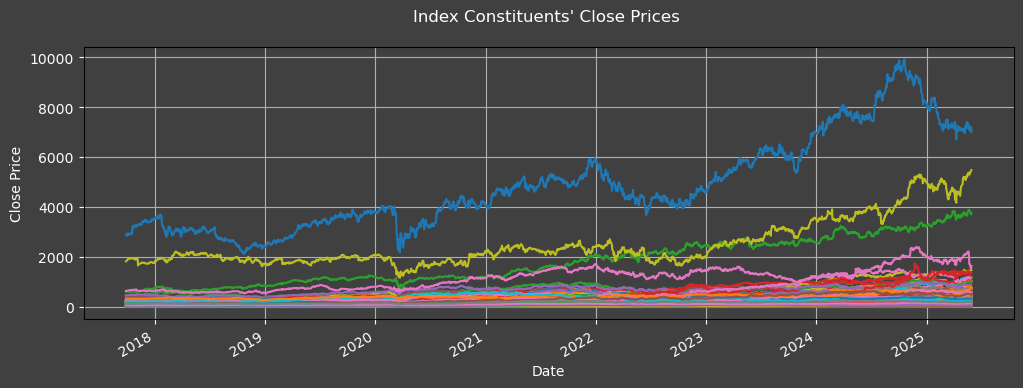

In [21]:
plot1ax(dataset = daily_df_no_na,
        ylabel = "Close Price",
        title = "Index Constituents' Close Prices",
        xlabel = "Date",
        legend = False,
        datasubset = datasubset_list)

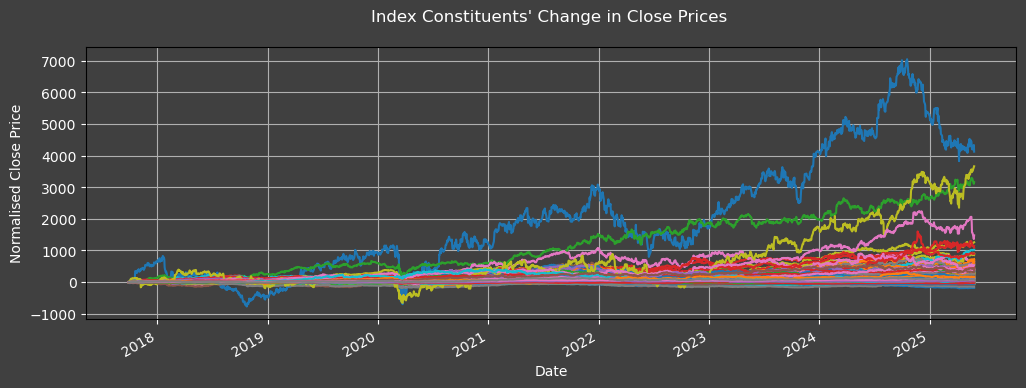

In [22]:
plot1ax(dataset = daily_df_trend, legend = False,
        ylabel = "Normalised Close Price",
        title = "Index Constituents' Change in Close Prices",
        datasubset = datasubset_list, xlabel = "Date",)

The graph above shows the change in constituent companies' close prices since COVID.

$ \\ $
## Saving our data

The cell bellow saves variables to a 'pickle' file to quicken subsequent runs of this code if they are seen as necessary.

In [23]:
# pip install pickle-mixin
import pickle

pickle_out = open("SPX.pickle","wb")
pickl = (COVID_start_date, days_since_COVID,
         index_Announcement_df, index_Announcement_list,
         Announcement_COVID_date,
         Instruments_Income_Statement_Announcement_COVID_date,
         Instruments_Cash_Flow_Statement_Announcement_COVID_date,
         Instruments_Balance_Sheet_COVID_date,
         daily_df, daily_df_no_na,
         daily_df_trend, datasubset_list)
pickle.dump(pickl, pickle_out)
pickle_out.close()

The cell bellow can be run to load these variables back into the kernel

In [24]:
# pickle_in = open("pickl.pickle","rb")
# COVID_start_date, days_since_COVID, index_Announcement_df, index_Announcement_list, Announcement_COVID_date, Instruments_Income_Statement_Announcement_COVID_date, Instruments_Cash_Flow_Statement_Announcement_COVID_date, Instruments_Balance_Sheet_COVID_date, daily_df, daily_df_no_na, daily_df_trend, datasubset_list = pickle.load(pickle_in)

$$ \\ $$
## Post-COVID-Announcement Price Insight

Now we can start investigating price changes after the first Post-COVID-Announcement of each company in our dataset.

In [25]:
# This is just to delimitate between the code before and after this point
daily_df2 = daily_df_no_na

The cell bellow formats the date-type of our data to enable us to apply them to simple algebra.

In [26]:
date_in_date_format = []
for k in range(len(daily_df2)):
    date_in_date_format.append(daily_df2.index[k].date())
daily_df2.index = date_in_date_format

The cell bellow renames the columns of our dataset.

In [27]:
daily_df2_instruments = []
for i in daily_df2.columns:
    daily_df2_instruments.append(str.split(i)[0])

Now: we collect daily prices only for dates after the first Post-COVID-Announcement of each instrument of interest

In [28]:
daily_df2_post_COVID_announcement = pandas.DataFrame()
for i,j in zip(daily_df2.columns, daily_df2_instruments):
    daily_df2_post_COVID_announcement = pandas.merge(daily_df2_post_COVID_announcement,
                                                     daily_df2[i][daily_df2.index >= Instruments_Income_Statement_Announcement_COVID_date.loc[j].iloc[0].date()],
                                                     how = "outer", left_index = True, right_index = True) # Note that the following would not work: ' daily_df2_post_COVID_announcement[i] = daily_df2[i][daily_df2.index >= Instruments_Income_Statement_Announcement_COVID_date.loc[j].iloc[0].date()] '

Now we can focus on the trend/change in those prices

In [29]:
daily_df2_post_COVID_announcement_trend = pandas.DataFrame()
for i in daily_df2.columns:
    try:
        daily_df2_post_COVID_announcement_trend = pandas.merge(daily_df2_post_COVID_announcement_trend,
                                                               daily_df2_post_COVID_announcement.reset_index()[i].dropna().reset_index()[i] - daily_df2_post_COVID_announcement.reset_index()[i].dropna().iloc[0],
                                                               how = "outer", left_index = True, right_index = True)
    except:
        daily_df2_post_COVID_announcement_trend[i] = numpy.nan

And plot them

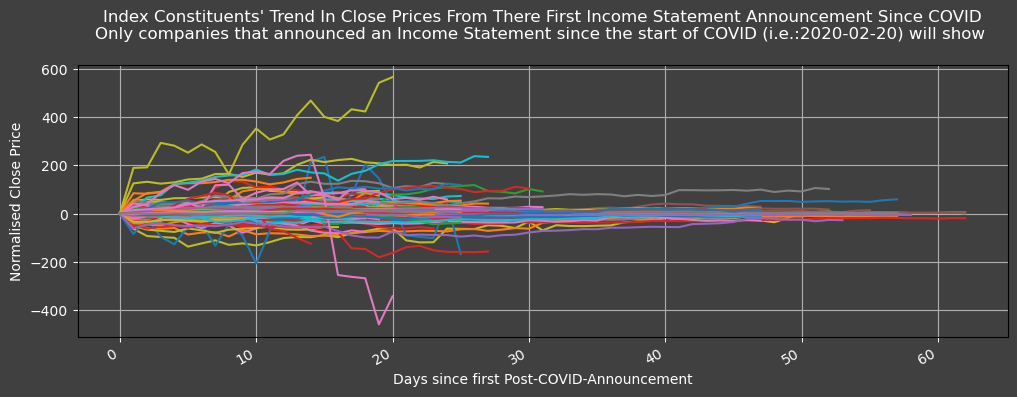

In [30]:
plot1ax(dataset = daily_df2_post_COVID_announcement_trend,
        ylabel = "Normalised Close Price",
        title = "Index Constituents' Trend In Close Prices From There First Income Statement Announcement Since COVID\n" + 
                "Only companies that announced an Income Statement since the start of COVID (i.e.:" + str(COVID_start_date) + ") will show",
        xlabel = "Days since first Post-COVID-Announcement",
        legend = False, # change to "underneath" to see list of all instruments and their respective colors as per this graph's legend.
        datasubset = datasubset_list)

Some companies have lost and gained a great deal following from their first Post-COVID-Announcement, but most seem to have changed by less than 50 United States of america Dollars (USD).

$$ \\ $$
### Post COVID Announcement Price Change

The cell bellow simply gathers all stocks that decreased, increased or did not change in price since their first Post-COVID-Announcement in an easy to digest [pandas](https://pandas.pydata.org/) table. Note that is they haven't had a Post-COVID-Announcement yet, they will show as unchanged.

In [31]:
COVID_priced_in = [[],[],[]]
for i in daily_df2_post_COVID_announcement_trend.columns:
    if str(sum(daily_df2_post_COVID_announcement_trend[i].dropna())) != "nan":
        if numpy.mean(daily_df2_post_COVID_announcement_trend[i].dropna()) < 0:
            COVID_priced_in[0].append(str.split(i)[0])
        if numpy.mean(daily_df2_post_COVID_announcement_trend[i].dropna()) == 0:
            COVID_priced_in[1].append(str.split(i)[0])
        if numpy.mean(daily_df2_post_COVID_announcement_trend[i].dropna()) > 0:
            COVID_priced_in[2].append(str.split(i)[0])
COVID_priced_in = pandas.DataFrame(COVID_priced_in, index = ["Did not have the negative impact of COVID priced in enough",
                                                             "Had the effects of COVID priced in (or didn't have time to react to new company announcements)",
                                                             "Had a price that overcompensated the negative impact of COVID"])
COVID_priced_in

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328
Did not have the negative impact of COVID priced in enough,CNP.N,TKO.N,HD.N,SPG.N,CTRA.N,AIG.N,EVRG.OQ,COST.OQ,LULU.OQ,PAYX.OQ,VTR.N,AMAT.OQ,DELL.N,NVR.N,LOW.N,EXPE.OQ,CL.N,UNH.N,ARE.N,LLY.N,AVB.N,WMB.N,EA.OQ,TMUS.OQ,CB.N,BRO.N,KEYS.N,PCG.N,TTWO.OQ,COO.OQ,CCL.N,KHC.OQ,DECK.N,LW.N,NTAP.OQ,EXC.OQ,EMN.N,DUK.N,VTRS.OQ,MKC.N,COR.N,ORCL.N,CPRT.OQ,LEN.N,ROST.OQ,MRK.N,WEC.N,TMO.N,LYB.N,IQV.N,VRTX.OQ,PEP.OQ,CVS.N,HUM.N,GILD.OQ,PNW.N,BFb.N,HSY.N,GL.N,SLB.N,AWK.N,ED.N,AEE.N,NUE.N,DVA.N,CMS.N,HPE.N,CSGP.OQ,NWSA.OQ,ERIE.OQ,AAPL.OQ,CLX.N,FDX.N,O.N,RVTY.N,QCOM.OQ,IPG.N,KO.N,FI.N,AMGN.OQ,NKE.N,ELV.N,K.N,CCI.N,MOH.N,GDDY.N,WDAY.OQ,ORLY.OQ,NI.N,AEP.OQ,HOLX.OQ,IFF.N,FE.N,NEM.N,GIS.N,PFE.N,EIX.N,MU.OQ,TYL.N,KMX.N,MDT.N,DPZ.OQ,KDP.OQ,PEG.N,TRGP.N,UDR.N,AMT.N,CAG.N,TJX.N,BMY.N,MHK.N,TPL.N,BKR.OQ,AFL.N,MSI.N,XEL.OQ,KMB.N,ADBE.OQ,TSN.N,AKAM.OQ,BRKb.N,XOM.N,INTC.OQ,OMC.N,SBUX.OQ,ATO.N,ETR.N,HAL.N,YUM.N,CPB.OQ,JNPR.N,EG.N,FTNT.OQ,DOC.N,PPL.N,CVX.N,CI.N,PANW.OQ,ENPH.OQ,SO.N,MKTX.OQ,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Had the effects of COVID priced in (or didn't have time to react to new company announcements),HPQ.N,NVDA.OQ,A.N,NDSN.OQ,CRM.N,SNPS.OQ,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Non

$$ \\ $$
## Informative Powers of Announcements Per Sector

We will now investigate the insight behind our analysis per industry sector.

The 2 cells bellow allow us to see the movement in daily price of companies with Post-COVID-Announcements per sector

In [32]:
ESector = ld.get_data(universe = [i.split()[0] for i in daily_df2_post_COVID_announcement_trend.dropna(axis = "columns", how = "all").columns],
                           fields = ["TR.TRBCEconSectorCode",
                                     "TR.TRBCBusinessSectorCode",
                                     "TR.TRBCIndustryGroupCode",
                                     "TR.TRBCIndustryCode",
                                     "TR.TRBCActivityCode",
                                     "TR.TRBCEconomicSector"])

daily_df2_post_COVID_announcement_trend_mean = daily_df2_post_COVID_announcement_trend.mean().to_frame().reset_index()
daily_df2_post_COVID_announcement_trend_mean.rename(columns={0: "Average of Close Prices Post COVID Announcement"}, inplace=True)
daily_df2_post_COVID_announcement_trend_mean['Instrument'] = daily_df2_post_COVID_announcement_trend_mean['index'].str.replace(' Close Price', '')

ESector_df = ESector[['Instrument','TRBC Economic Sector Name']]
ESector_df = ESector_df.merge(daily_df2_post_COVID_announcement_trend_mean, how='inner', on='Instrument')

In [33]:
ESector_average = ESector_df.groupby('TRBC Economic Sector Name')['Average of Close Prices Post COVID Announcement'].mean().to_frame()
ESector_average

,Average of Close Prices Post COVID Announcement
TRBC Economic Sector Name,
Basic Materials,4.562496
Consumer Cyclicals,7.339856
Consumer Non-Cyclicals,0.184073
Energy,2.089713
Financials,6.173825
Healthcare,0.884341
Industrials,13.009098
Real Estate,1.090405
Technology,10.429470


The 'ESector_average'  table above shows the Close Prices Post COVID-Announcement for each company averaged per sector
$$ \\ $$

$$ \\ $$
# Conclusion

Using S&P 500 (i.e.: SPX) data, this last graph can provide a wholesome picture of industries in the United States of America (USA). We can see a great negative change in instruments’ daily close prices for stocks in the Consumer Cyclical, Utilities, Healthcare and Industrial markets. This is actually surprising because they are the industries that were suggested to be most hindered by COVID in the media before their financial statement announcements; investors thus ought to have priced the negative effects of the Disease on these market sectors appropriately. \
The graph suggests that it may be profitable to short companies within these sectors just before they are due to release their first post-COVID Financial Statements - but naturally does not account for future changes, trade costs or other such variants external to this investigation. \
Companies in the Financial sector seem to have performed adequately. Reasons for movements in this sector can be complex and numerous due to their exposure to all other sectors. \
Tech companies seem to have had the impact of COVID priced in prior to the release of their financial statements. One may postulate the impact of COVID on their share price was actually positive as people rush to online infrastructures they support during confinement. \
Companies dealing with Basic Material have performed relatively well. This may be an indication that investors are losing confidence in all but sectors that offer physical goods in supply chains (rather than in consumer goods) - a retreat to fundamentals in a time of uncertainty.

**BUT** one must use both the ESector_average table before coming to any conclusion. The ESector_average - though simple - can provide more depth to our analysis. Take the Healthcare sector for example: One may assume that this sector is performing badly when revealing information via Announcements; but the ESector_average shows a positive ‘Average of Close Prices Post COVID Announcement’. This is because only very few companies within the Healthcare sector published Announcements before May 2020, and the only ones that did performed badly, skewing the data negatively.

## References

You can find more detail regarding the Data Library and related technologies for this notebook from the following resources:
* [LSEG Data Library for Python Page](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python) on the [LSEG Developer Community](https://developers.lseg.com/) web site.
   * [Quick Start Guide page](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/quick-start).
   * [Tutorial page](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/tutorials).
   * [Python Quants Tutorial Series for the Data Library](https://developers.lseg.com/en/api-catalog/lseg-data-platform/lseg-data-library-for-python/tutorials#python-quant-tutorials).
* [The Data Library for Python  - Quick Reference Guide (Access layer)
](https://developers.lseg.com/en/article-catalog/article/the-data-library-for-python-quick-reference-guide-access-layer).

For any question related to this example or the Data Library, please use the Developers Community [Q&A Forum](https://community.developers.refinitiv.com/).